# Uncapacitated facility location

The uncapacitated facility location problem (UFLP) calls for locating an undetermined number of facilities to minimize the sum of the fixed setup costs and the variable costs of serving the customers demand from the selected facilities. 

## Data

* A set $N =\{1, \ldots, n\}$ of potential depots
* A set $M =\{1, \ldots, m\}$ of clients
* A cost $f_j$ of opening a facility $j$
* A cost $c_{ij}$ associated with serving customer $i$ from facility $j$



In [31]:
import gurobipy as gb 
import random
import matplotlib.pyplot as plt

In [32]:


Facilities = ["LAquila", 
              "Avezzano", 
              "Pescara", 
              "Teramo", 
              "Chieti", 
              "Sulmona"]

OpeningCosts = [1500, 1200, 250, 100, 200, 250]

Plants = dict(zip(Facilities, OpeningCosts))

Plants


{'LAquila': 1500,
 'Avezzano': 1200,
 'Pescara': 250,
 'Teramo': 100,
 'Chieti': 200,
 'Sulmona': 250}

In [33]:
Clients = list(range(10))

In [34]:
Clients

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
random.seed(100)

Costs = {(i,j):random.randint(10,200) 
         for i in Clients for j in Facilities }

In [36]:
Costs

{(0, 'LAquila'): 47,
 (0, 'Avezzano'): 127,
 (0, 'Pescara'): 126,
 (0, 'Teramo'): 54,
 (0, 'Chieti'): 190,
 (0, 'Sulmona'): 110,
 (1, 'LAquila'): 197,
 (1, 'Avezzano'): 99,
 (1, 'Pescara'): 120,
 (1, 'Teramo'): 139,
 (1, 'Chieti'): 38,
 (1, 'Sulmona'): 146,
 (2, 'LAquila'): 41,
 (2, 'Avezzano'): 30,
 (2, 'Pescara'): 198,
 (2, 'Teramo'): 126,
 (2, 'Chieti'): 77,
 (2, 'Sulmona'): 22,
 (3, 'LAquila'): 178,
 (3, 'Avezzano'): 175,
 (3, 'Pescara'): 62,
 (3, 'Teramo'): 95,
 (3, 'Chieti'): 68,
 (3, 'Sulmona'): 89,
 (4, 'LAquila'): 62,
 (4, 'Avezzano'): 55,
 (4, 'Pescara'): 46,
 (4, 'Teramo'): 58,
 (4, 'Chieti'): 98,
 (4, 'Sulmona'): 104,
 (5, 'LAquila'): 170,
 (5, 'Avezzano'): 114,
 (5, 'Pescara'): 63,
 (5, 'Teramo'): 113,
 (5, 'Chieti'): 128,
 (5, 'Sulmona'): 152,
 (6, 'LAquila'): 80,
 (6, 'Avezzano'): 106,
 (6, 'Pescara'): 51,
 (6, 'Teramo'): 176,
 (6, 'Chieti'): 173,
 (6, 'Sulmona'): 41,
 (7, 'LAquila'): 56,
 (7, 'Avezzano'): 11,
 (7, 'Pescara'): 164,
 (7, 'Teramo'): 111,
 (7, 'Chieti'): 47

## Variables

$$
y_{j}=
\begin{cases}
1 \text{ if facility } j \text{ is open},\\
0 \text{ otherwise}
\end{cases}
$$

$$
x_{ij}=
\begin{cases}
1 \text{ if client } i \text{ is served from facility} j,\\
0 \text{ otherwise}
\end{cases}
$$

In [37]:
ufl = gb.Model('FacilityLocation')

In [38]:
Facilities

['LAquila', 'Avezzano', 'Pescara', 'Teramo', 'Chieti', 'Sulmona']

In [39]:
y = ufl.addVars (Facilities, 
                 vtype=gb.GRB.BINARY, 
                 name='y')

ufl.update()

In [40]:
y

{'LAquila': <gurobi.Var y[LAquila]>,
 'Avezzano': <gurobi.Var y[Avezzano]>,
 'Pescara': <gurobi.Var y[Pescara]>,
 'Teramo': <gurobi.Var y[Teramo]>,
 'Chieti': <gurobi.Var y[Chieti]>,
 'Sulmona': <gurobi.Var y[Sulmona]>}

In [41]:
x = ufl.addVars (Clients, Facilities, 
                 vtype=gb.GRB.BINARY, 
                 name = 'x')

ufl.update()

In [42]:
x

{(0, 'LAquila'): <gurobi.Var x[0,LAquila]>,
 (0, 'Avezzano'): <gurobi.Var x[0,Avezzano]>,
 (0, 'Pescara'): <gurobi.Var x[0,Pescara]>,
 (0, 'Teramo'): <gurobi.Var x[0,Teramo]>,
 (0, 'Chieti'): <gurobi.Var x[0,Chieti]>,
 (0, 'Sulmona'): <gurobi.Var x[0,Sulmona]>,
 (1, 'LAquila'): <gurobi.Var x[1,LAquila]>,
 (1, 'Avezzano'): <gurobi.Var x[1,Avezzano]>,
 (1, 'Pescara'): <gurobi.Var x[1,Pescara]>,
 (1, 'Teramo'): <gurobi.Var x[1,Teramo]>,
 (1, 'Chieti'): <gurobi.Var x[1,Chieti]>,
 (1, 'Sulmona'): <gurobi.Var x[1,Sulmona]>,
 (2, 'LAquila'): <gurobi.Var x[2,LAquila]>,
 (2, 'Avezzano'): <gurobi.Var x[2,Avezzano]>,
 (2, 'Pescara'): <gurobi.Var x[2,Pescara]>,
 (2, 'Teramo'): <gurobi.Var x[2,Teramo]>,
 (2, 'Chieti'): <gurobi.Var x[2,Chieti]>,
 (2, 'Sulmona'): <gurobi.Var x[2,Sulmona]>,
 (3, 'LAquila'): <gurobi.Var x[3,LAquila]>,
 (3, 'Avezzano'): <gurobi.Var x[3,Avezzano]>,
 (3, 'Pescara'): <gurobi.Var x[3,Pescara]>,
 (3, 'Teramo'): <gurobi.Var x[3,Teramo]>,
 (3, 'Chieti'): <gurobi.Var x[3,Chieti

In [43]:
ufl.update ()

ufl.write('ufl.lp')

## Objective function

$$
\min \sum_{j=1}^n f_j y_j + \sum_{i=1}^m \sum_{j=1}^n c_{ij}x_{ij}
$$


In [44]:
Costs

{(0, 'LAquila'): 47,
 (0, 'Avezzano'): 127,
 (0, 'Pescara'): 126,
 (0, 'Teramo'): 54,
 (0, 'Chieti'): 190,
 (0, 'Sulmona'): 110,
 (1, 'LAquila'): 197,
 (1, 'Avezzano'): 99,
 (1, 'Pescara'): 120,
 (1, 'Teramo'): 139,
 (1, 'Chieti'): 38,
 (1, 'Sulmona'): 146,
 (2, 'LAquila'): 41,
 (2, 'Avezzano'): 30,
 (2, 'Pescara'): 198,
 (2, 'Teramo'): 126,
 (2, 'Chieti'): 77,
 (2, 'Sulmona'): 22,
 (3, 'LAquila'): 178,
 (3, 'Avezzano'): 175,
 (3, 'Pescara'): 62,
 (3, 'Teramo'): 95,
 (3, 'Chieti'): 68,
 (3, 'Sulmona'): 89,
 (4, 'LAquila'): 62,
 (4, 'Avezzano'): 55,
 (4, 'Pescara'): 46,
 (4, 'Teramo'): 58,
 (4, 'Chieti'): 98,
 (4, 'Sulmona'): 104,
 (5, 'LAquila'): 170,
 (5, 'Avezzano'): 114,
 (5, 'Pescara'): 63,
 (5, 'Teramo'): 113,
 (5, 'Chieti'): 128,
 (5, 'Sulmona'): 152,
 (6, 'LAquila'): 80,
 (6, 'Avezzano'): 106,
 (6, 'Pescara'): 51,
 (6, 'Teramo'): 176,
 (6, 'Chieti'): 173,
 (6, 'Sulmona'): 41,
 (7, 'LAquila'): 56,
 (7, 'Avezzano'): 11,
 (7, 'Pescara'): 164,
 (7, 'Teramo'): 111,
 (7, 'Chieti'): 47

In [45]:
x

{(0, 'LAquila'): <gurobi.Var x[0,LAquila]>,
 (0, 'Avezzano'): <gurobi.Var x[0,Avezzano]>,
 (0, 'Pescara'): <gurobi.Var x[0,Pescara]>,
 (0, 'Teramo'): <gurobi.Var x[0,Teramo]>,
 (0, 'Chieti'): <gurobi.Var x[0,Chieti]>,
 (0, 'Sulmona'): <gurobi.Var x[0,Sulmona]>,
 (1, 'LAquila'): <gurobi.Var x[1,LAquila]>,
 (1, 'Avezzano'): <gurobi.Var x[1,Avezzano]>,
 (1, 'Pescara'): <gurobi.Var x[1,Pescara]>,
 (1, 'Teramo'): <gurobi.Var x[1,Teramo]>,
 (1, 'Chieti'): <gurobi.Var x[1,Chieti]>,
 (1, 'Sulmona'): <gurobi.Var x[1,Sulmona]>,
 (2, 'LAquila'): <gurobi.Var x[2,LAquila]>,
 (2, 'Avezzano'): <gurobi.Var x[2,Avezzano]>,
 (2, 'Pescara'): <gurobi.Var x[2,Pescara]>,
 (2, 'Teramo'): <gurobi.Var x[2,Teramo]>,
 (2, 'Chieti'): <gurobi.Var x[2,Chieti]>,
 (2, 'Sulmona'): <gurobi.Var x[2,Sulmona]>,
 (3, 'LAquila'): <gurobi.Var x[3,LAquila]>,
 (3, 'Avezzano'): <gurobi.Var x[3,Avezzano]>,
 (3, 'Pescara'): <gurobi.Var x[3,Pescara]>,
 (3, 'Teramo'): <gurobi.Var x[3,Teramo]>,
 (3, 'Chieti'): <gurobi.Var x[3,Chieti

In [46]:
x.prod(Costs)

<gurobi.LinExpr: 47.0 x[0,LAquila] + 127.0 x[0,Avezzano] + 126.0 x[0,Pescara] + 54.0 x[0,Teramo] + 190.0 x[0,Chieti] + 110.0 x[0,Sulmona] + 197.0 x[1,LAquila] + 99.0 x[1,Avezzano] + 120.0 x[1,Pescara] + 139.0 x[1,Teramo] + 38.0 x[1,Chieti] + 146.0 x[1,Sulmona] + 41.0 x[2,LAquila] + 30.0 x[2,Avezzano] + 198.0 x[2,Pescara] + 126.0 x[2,Teramo] + 77.0 x[2,Chieti] + 22.0 x[2,Sulmona] + 178.0 x[3,LAquila] + 175.0 x[3,Avezzano] + 62.0 x[3,Pescara] + 95.0 x[3,Teramo] + 68.0 x[3,Chieti] + 89.0 x[3,Sulmona] + 62.0 x[4,LAquila] + 55.0 x[4,Avezzano] + 46.0 x[4,Pescara] + 58.0 x[4,Teramo] + 98.0 x[4,Chieti] + 104.0 x[4,Sulmona] + 170.0 x[5,LAquila] + 114.0 x[5,Avezzano] + 63.0 x[5,Pescara] + 113.0 x[5,Teramo] + 128.0 x[5,Chieti] + 152.0 x[5,Sulmona] + 80.0 x[6,LAquila] + 106.0 x[6,Avezzano] + 51.0 x[6,Pescara] + 176.0 x[6,Teramo] + 173.0 x[6,Chieti] + 41.0 x[6,Sulmona] + 56.0 x[7,LAquila] + 11.0 x[7,Avezzano] + 164.0 x[7,Pescara] + 111.0 x[7,Teramo] + 47.0 x[7,Chieti] + 154.0 x[7,Sulmona] + 51.0 x[

In [47]:
y

{'LAquila': <gurobi.Var y[LAquila]>,
 'Avezzano': <gurobi.Var y[Avezzano]>,
 'Pescara': <gurobi.Var y[Pescara]>,
 'Teramo': <gurobi.Var y[Teramo]>,
 'Chieti': <gurobi.Var y[Chieti]>,
 'Sulmona': <gurobi.Var y[Sulmona]>}

In [48]:
Plants

{'LAquila': 1500,
 'Avezzano': 1200,
 'Pescara': 250,
 'Teramo': 100,
 'Chieti': 200,
 'Sulmona': 250}

In [49]:
ufl.setObjective(y.prod(Plants) + x.prod(Costs), gb.GRB.MINIMIZE)

ufl.write('ufl.lp')


## Constraints 

Demand of client $i$ must be satisfied

$$
\sum_{j=1}^n x_{ij} = 1 \text{ for } i=1,\ldots,m 
$$

A client can be served from facility $j$ only if facility $j$ is open:

$$
x_{ij} \le y_j \;\; \forall i,j
$$

In [50]:
ufl.addConstrs((x.sum(i,'*') == 1 for i in Clients), name='Dem')

ufl.update()

ufl.write('ufl.lp')

In [51]:
l = list()
for i in Clients:
    for j in Facilities:
        l.append(x[(i, j)])

In [52]:
l

[<gurobi.Var x[0,LAquila]>,
 <gurobi.Var x[0,Avezzano]>,
 <gurobi.Var x[0,Pescara]>,
 <gurobi.Var x[0,Teramo]>,
 <gurobi.Var x[0,Chieti]>,
 <gurobi.Var x[0,Sulmona]>,
 <gurobi.Var x[1,LAquila]>,
 <gurobi.Var x[1,Avezzano]>,
 <gurobi.Var x[1,Pescara]>,
 <gurobi.Var x[1,Teramo]>,
 <gurobi.Var x[1,Chieti]>,
 <gurobi.Var x[1,Sulmona]>,
 <gurobi.Var x[2,LAquila]>,
 <gurobi.Var x[2,Avezzano]>,
 <gurobi.Var x[2,Pescara]>,
 <gurobi.Var x[2,Teramo]>,
 <gurobi.Var x[2,Chieti]>,
 <gurobi.Var x[2,Sulmona]>,
 <gurobi.Var x[3,LAquila]>,
 <gurobi.Var x[3,Avezzano]>,
 <gurobi.Var x[3,Pescara]>,
 <gurobi.Var x[3,Teramo]>,
 <gurobi.Var x[3,Chieti]>,
 <gurobi.Var x[3,Sulmona]>,
 <gurobi.Var x[4,LAquila]>,
 <gurobi.Var x[4,Avezzano]>,
 <gurobi.Var x[4,Pescara]>,
 <gurobi.Var x[4,Teramo]>,
 <gurobi.Var x[4,Chieti]>,
 <gurobi.Var x[4,Sulmona]>,
 <gurobi.Var x[5,LAquila]>,
 <gurobi.Var x[5,Avezzano]>,
 <gurobi.Var x[5,Pescara]>,
 <gurobi.Var x[5,Teramo]>,
 <gurobi.Var x[5,Chieti]>,
 <gurobi.Var x[5,Sulmona]>

In [53]:
[x[(i,j)] for i in Clients for j in Facilities]

[<gurobi.Var x[0,LAquila]>,
 <gurobi.Var x[0,Avezzano]>,
 <gurobi.Var x[0,Pescara]>,
 <gurobi.Var x[0,Teramo]>,
 <gurobi.Var x[0,Chieti]>,
 <gurobi.Var x[0,Sulmona]>,
 <gurobi.Var x[1,LAquila]>,
 <gurobi.Var x[1,Avezzano]>,
 <gurobi.Var x[1,Pescara]>,
 <gurobi.Var x[1,Teramo]>,
 <gurobi.Var x[1,Chieti]>,
 <gurobi.Var x[1,Sulmona]>,
 <gurobi.Var x[2,LAquila]>,
 <gurobi.Var x[2,Avezzano]>,
 <gurobi.Var x[2,Pescara]>,
 <gurobi.Var x[2,Teramo]>,
 <gurobi.Var x[2,Chieti]>,
 <gurobi.Var x[2,Sulmona]>,
 <gurobi.Var x[3,LAquila]>,
 <gurobi.Var x[3,Avezzano]>,
 <gurobi.Var x[3,Pescara]>,
 <gurobi.Var x[3,Teramo]>,
 <gurobi.Var x[3,Chieti]>,
 <gurobi.Var x[3,Sulmona]>,
 <gurobi.Var x[4,LAquila]>,
 <gurobi.Var x[4,Avezzano]>,
 <gurobi.Var x[4,Pescara]>,
 <gurobi.Var x[4,Teramo]>,
 <gurobi.Var x[4,Chieti]>,
 <gurobi.Var x[4,Sulmona]>,
 <gurobi.Var x[5,LAquila]>,
 <gurobi.Var x[5,Avezzano]>,
 <gurobi.Var x[5,Pescara]>,
 <gurobi.Var x[5,Teramo]>,
 <gurobi.Var x[5,Chieti]>,
 <gurobi.Var x[5,Sulmona]>

In [57]:
ufl.addConstrs((x[(i,j)] <= y[j] for i in Clients for j in Facilities), 
               name = 'VUB') #VUB stands for variable upper bound

ufl.update()

ufl.write('ufl.lp')

In [58]:
ufl.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-6300U CPU @ 2.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 130 rows, 66 columns and 300 nonzeros
Model fingerprint: 0xa66087b4
Variable types: 0 continuous, 66 integer (66 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded MIP start from previous solve with objective 986

Presolve removed 80 rows and 22 columns
Presolve time: 0.00s
Presolved: 50 rows, 44 columns, 120 nonzeros
Variable types: 0 continuous, 44 integer (44 binary)

Root relaxation: cutoff, 23 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     

In [59]:
print('Obj: %g' % ufl.objVal)

print ()

for v in ufl.getVars():
    if v.x > 0.1:
        print ('%s=%g' % (v.varName, v.x))
    
    

Obj: 986

y[Teramo]=1
y[Chieti]=1
x[0,Teramo]=1
x[1,Chieti]=1
x[2,Chieti]=1
x[3,Chieti]=1
x[4,Teramo]=1
x[5,Teramo]=1
x[6,Chieti]=1
x[7,Chieti]=1
x[8,Teramo]=1
x[9,Teramo]=1


In [60]:
import networkx as nx

G = nx.Graph()

G.add_nodes_from(Clients)
G.add_nodes_from(Facilities)

#for u in Clients:
#    for v in Facilities:
#        G.add_edge(u,v)
        
G.add_edges_from(((u,v) for u in Clients for v in Facilities)) # similar to the 3 commented lines above

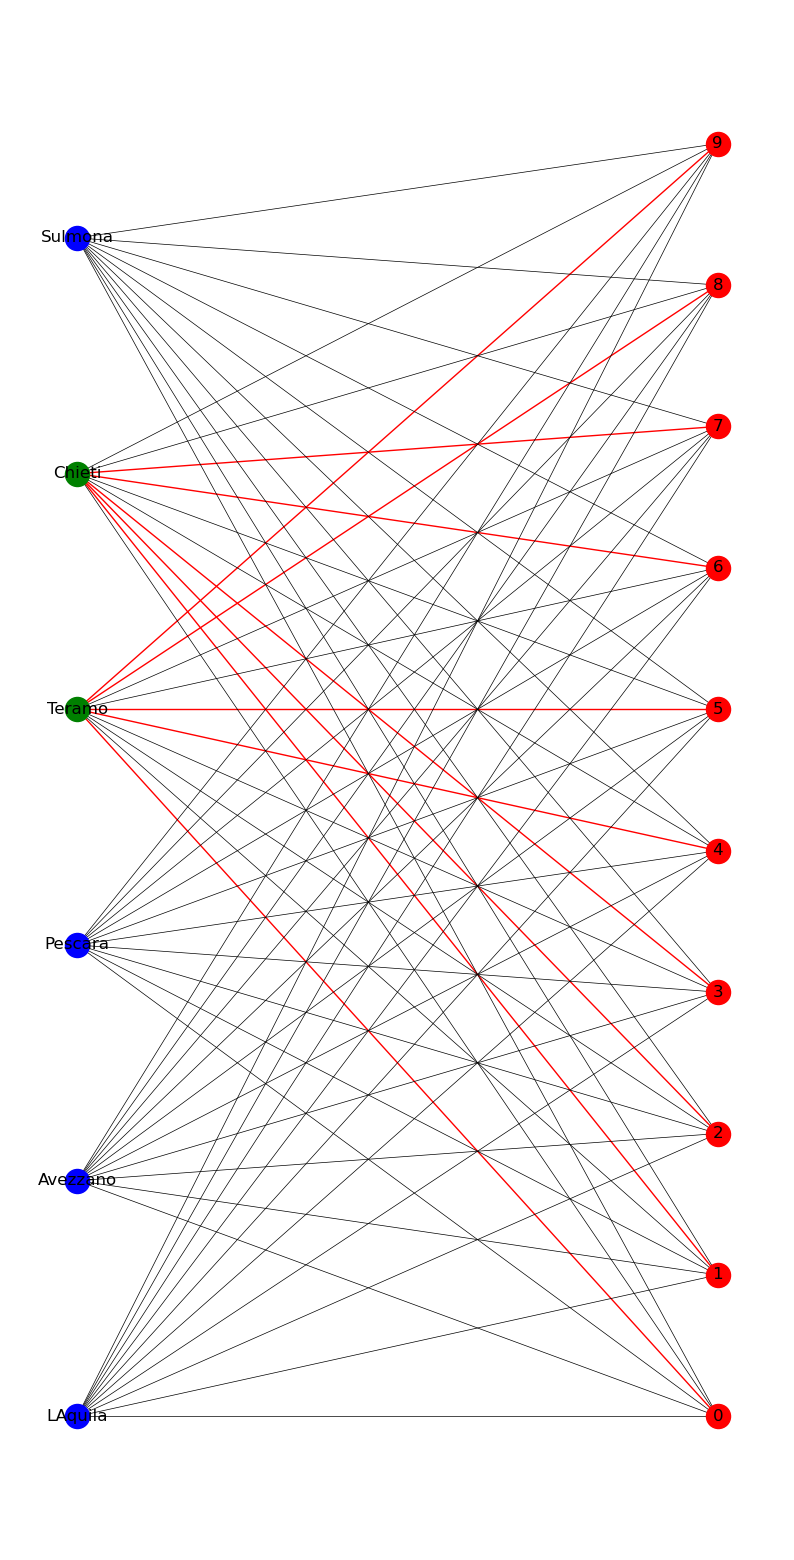

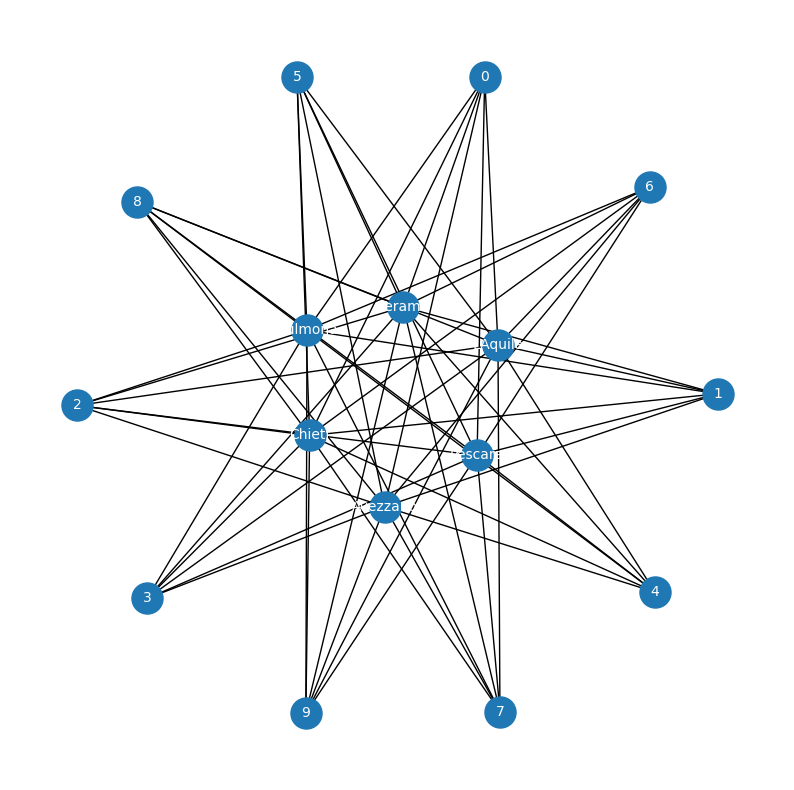

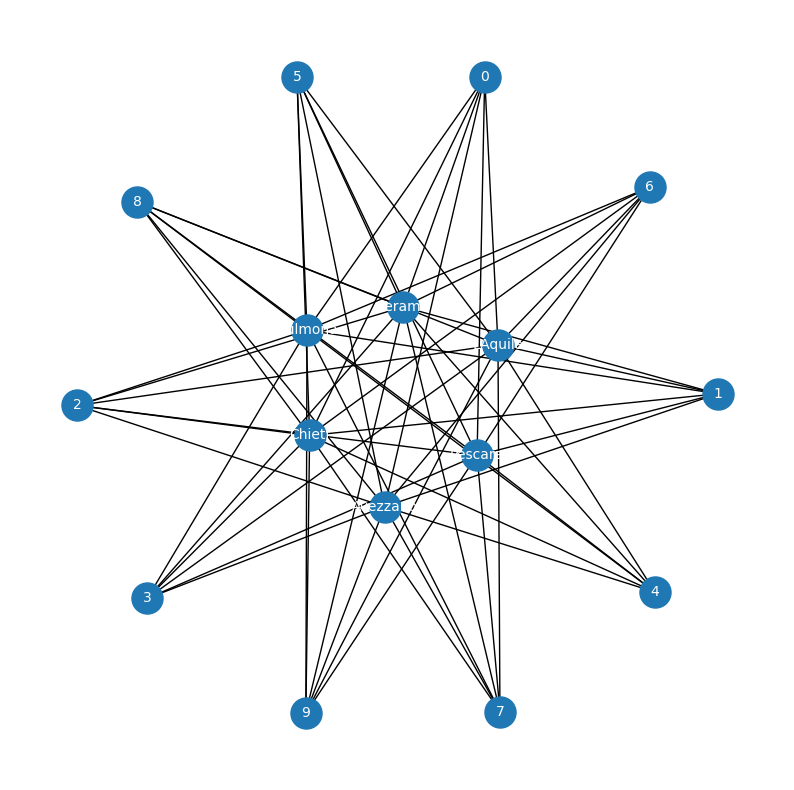

In [62]:

fig, ax = plt.subplots(1, 1, figsize=(10,10))

pos = nx.spring_layout(G, seed=20)


nx.draw(G, pos, ax, with_labels=True, node_size=500, font_size=10, font_color='w')

plt.show()

In [63]:
%matplotlib inline



pos = {}

for ind,u in enumerate(Facilities):
    pos[u] = (0.0, 50.0/len(Facilities) * ind)

for ind,u in enumerate(Clients):
    pos[u] = (20.0, 50.0/len(Clients) * ind)
    
    

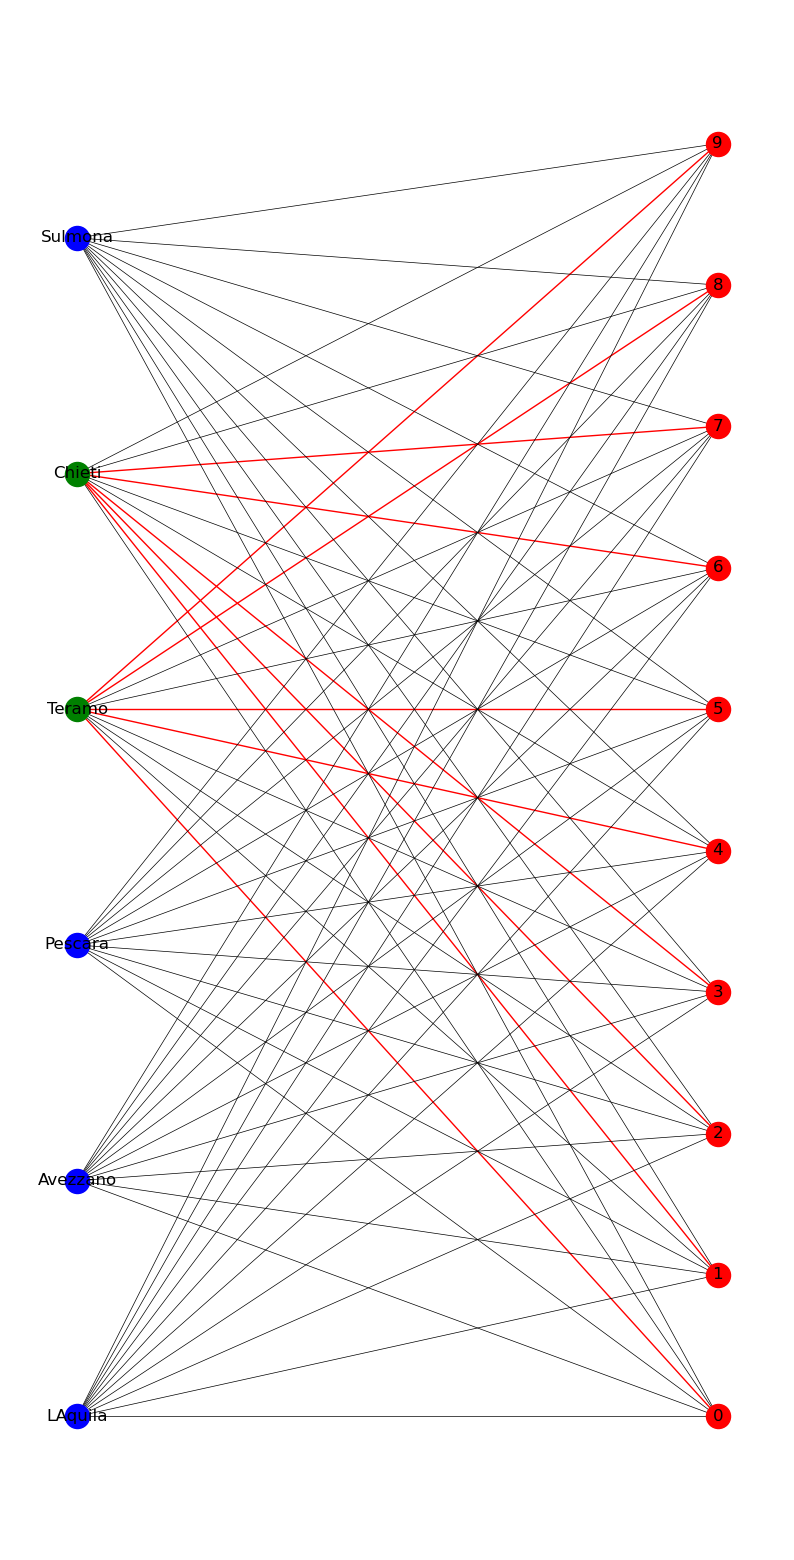

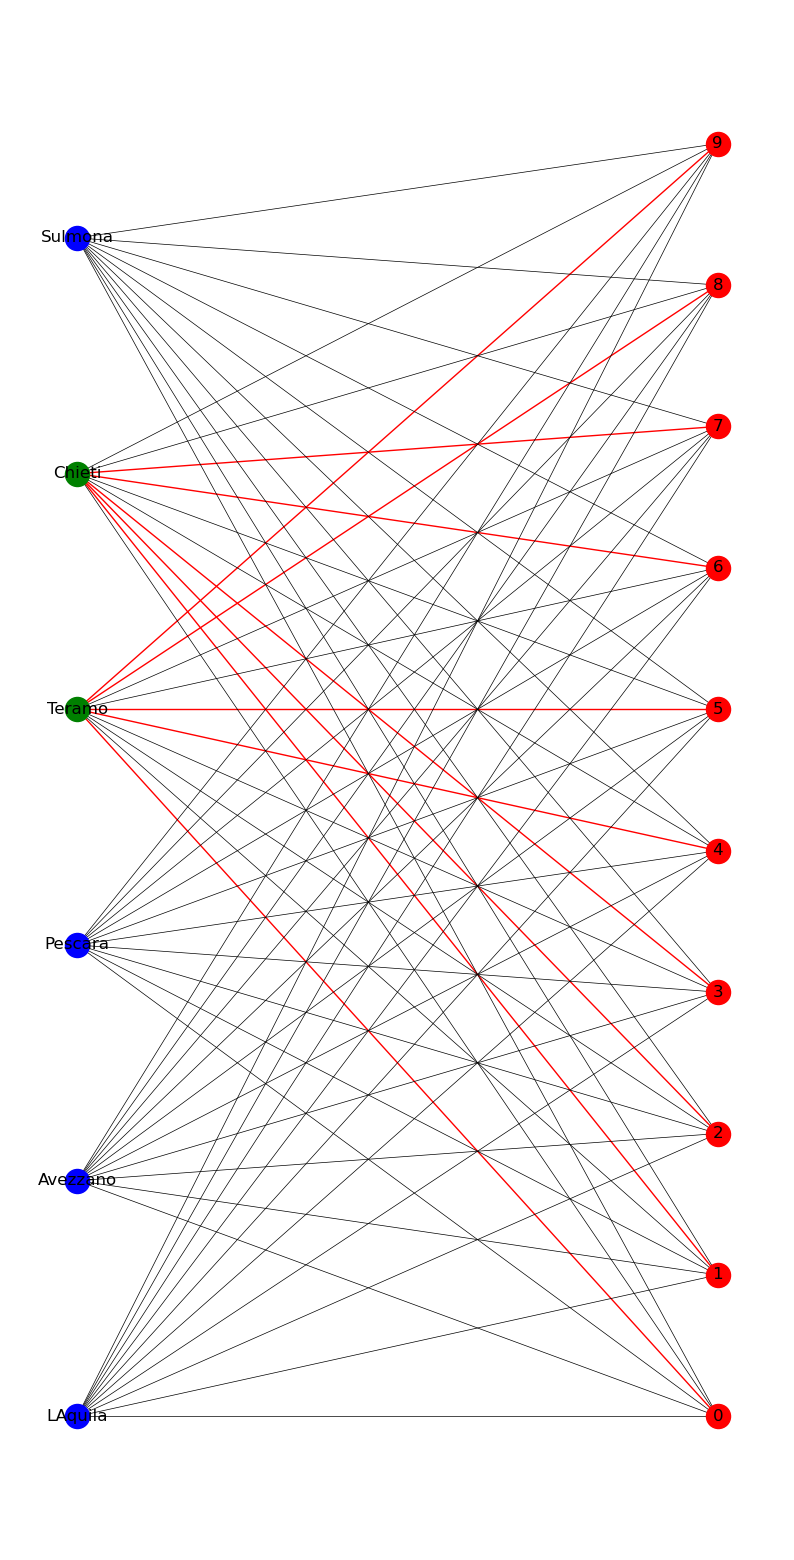

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(10,20))


activated_edge = [(i,j) for i,j in G.edges() if x[i,j].x > 1E-6]
not_activated_edge = [(i,j) for i,j in G.edges() if x[i,j].x <= 1E-6]

nx.draw_networkx_edges (G, pos, edgelist=activated_edge, ax=ax, 
                        edge_color='r')
nx.draw_networkx_edges (G, pos, edgelist=not_activated_edge,
                        ax=ax, edge_color='black', width=0.5)
#nx.draw_networkx_edge_labels (G, pos, edge_labels=Costs)

nodelab = {i:i for i in G.nodes()}

active_plants = [j for j in Facilities if y[j].x > 0.5]
not_active_plants = [j for j in Facilities if y[j].x < 0.5]

nx.draw_networkx_nodes(G,pos, nodelist=active_plants, 
                       ax=ax, node_color='g')
nx.draw_networkx_nodes(G, pos, nodelist=not_active_plants, 
                       ax=ax, node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=[u for u in Clients], 
                       ax=ax, node_color ='r')

nx.draw_networkx_labels (G,pos, labels=nodelab)

nx.draw(G, pos, ax, 
        node_size=500, alpha=0.0, font_size=10, font_color='b')

plt.show()